# Microvilli orientation
- Visualize Anastasia's microvilli orientation data for R7 and R7'
- NOTE: this was written for the data AM sent in April 2020: this spreadsheet only included R7 and R7', and lacked the z index in which each measurement was taken
- Replaced by notebook written for the new excel file AM sent in August 2020 that includes measurements for all photoreceptors along with the z index each measurement was taken

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [3]:
r7 = pd.read_excel('~/Data/microvilli angel.xlsx', sheet_name='R7_raw', index_col=0)
r7p = pd.read_excel('~/Data/microvilli angel.xlsx', sheet_name="R7'_raw", index_col=0)
# present data as deviation from first measurement
r7_dev = (r7 - r7.loc[1])
r7p_dev = (r7p - r7p.loc[1])

dra_om = ['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E6', 'E7']
ndra_om = [str(o) for o in r7.columns if o not in dra_om]

In [4]:
r7_sd = r7.std()
r7p_sd = r7p.std()

display(r7_sd.loc[[*dra_om, *ndra_om]])
display(r7p_sd.loc[[*dra_om, *ndra_om]])

display(f"DRA mean standard deviation - R7 = {r7_sd.loc[dra_om].mean(): .2f} degrees, R7' = {r7p_sd.loc[dra_om].mean(): .2f}")
display(f"NON-DRA mean standard deviation - R7 = {r7_sd.loc[ndra_om].mean(): .2f} degrees, R7' = {r7p_sd.loc[ndra_om].mean(): .2f}")
display(f"All om mean standard deviation - R7 = {r7_sd.mean(): .2f} degrees, R7' = {r7p_sd.mean(): .2f}")

A4    18.291662
A5    21.938827
B5     5.197318
B6     6.787939
C5     5.764306
C6    36.324985
D6     7.607014
D7     3.484266
E6     8.130607
E7    13.284532
D4    28.442927
C4    30.308444
C3     8.968395
B4    37.636419
D3     8.040757
B3    38.775708
B2     6.787480
A1    35.559285
C1    38.267625
E5    26.330388
C2     7.734942
D5    26.833870
E4    40.430056
D2    42.764882
A2    42.917751
A3    23.855074
A0    45.245744
B0     2.937213
B1    38.178470
dtype: float64

A4    33.698647
A5    16.508368
B5     6.425513
B6    15.424814
C5     4.282315
C6     6.251080
D6     6.251080
D7     8.301733
E6    11.211720
E7    22.308450
D4     8.374724
C4     3.574540
C3    16.800479
B4    11.570849
D3    14.710167
B3    26.344428
B2    18.394386
A1    12.090933
C1    23.436780
E5     9.792066
C2    23.352947
D5     3.778727
E4    20.392144
D2    17.513753
A2    13.325348
A3    17.680045
A0    24.079276
B0    24.156124
B1    28.151937
dtype: float64

"DRA mean standard deviation - R7 =  12.68 degrees, R7' =  13.07"

"NON-DRA mean standard deviation - R7 =  27.90 degrees, R7' =  16.71"

"All om mean standard deviation - R7 =  22.65 degrees, R7' =  15.45"

In [5]:
s, p, = mannwhitneyu(r7_sd[dra_om], r7_sd[ndra_om], alternative='less')
print("###### RESULTS ######")
print(f"Test statistic: {s}, p-value: {p: .6f}")
if p > 0.01:
    print("Fail to reject null")
else:
    print("Reject null: DRA R7 receive more inputs")

###### RESULTS ######
Test statistic: 37.0, p-value:  0.004166
Reject null: DRA R7 receive more inputs


In [6]:
s, p, = mannwhitneyu(r7p_sd[dra_om], r7p_sd[ndra_om], alternative='less')
print("###### RESULTS ######")
print(f"Test statistic: {s}, p-value: {p: .6f}")
if p > 0.01:
    print("Fail to reject null")
else:
    print("Reject null: DRA R7 receive more inputs")

###### RESULTS ######
Test statistic: 62.0, p-value:  0.067930
Fail to reject null


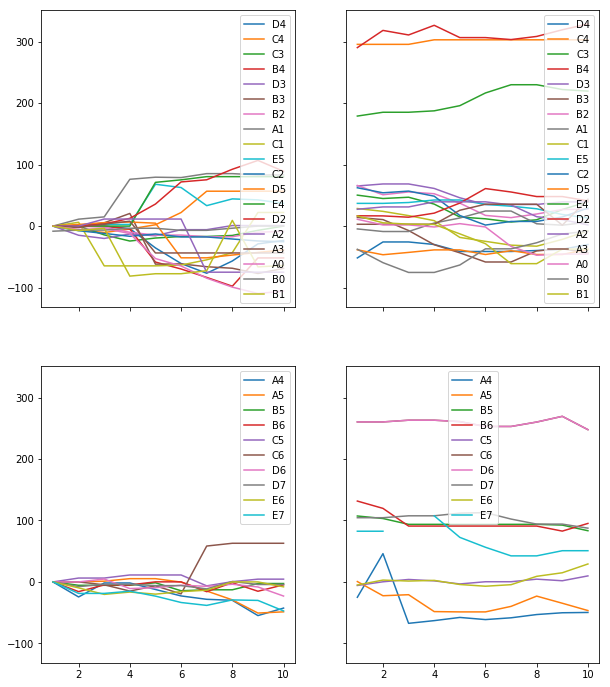

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[10, 12])

ax[0, 0].plot(r7.filter(items=ndra_om))
ax[0, 0].legend(r7.filter(items=ndra_om).columns)
ax[0, 1].plot(r7p.filter(items=ndra_om))
ax[0, 1].legend(r7p.filter(items=ndra_om).columns)

ax[1, 0].plot(r7.filter(items=dra_om))
ax[1, 0].legend(r7.filter(items=dra_om).columns)
ax[1, 1].plot(r7p.filter(items=dra_om))
ax[1, 1].legend(r7p.filter(items=dra_om).columns)
plt.show()

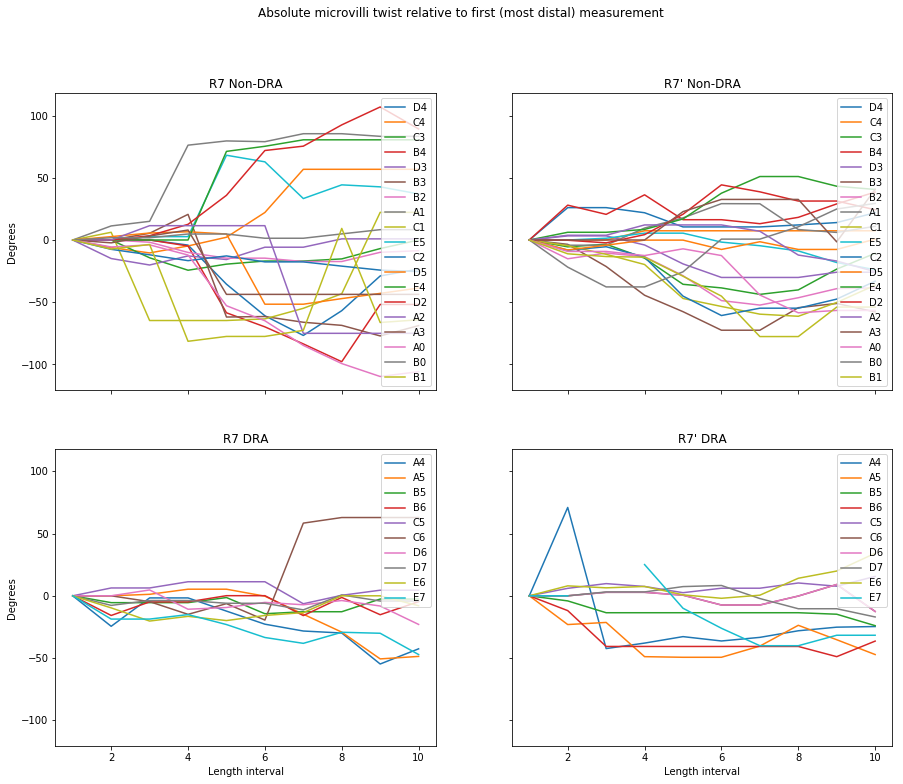

In [8]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[15, 12])

fig.suptitle('Absolute microvilli twist relative to first (most distal) measurement')
ax[0, 0].plot(r7_dev.filter(items=ndra_om))
ax[0, 0].legend(r7_dev.filter(items=ndra_om).columns)
ax[0, 0].set_title('R7 Non-DRA')
ax[0, 1].plot(r7p_dev.filter(items=ndra_om))
ax[0, 1].legend(r7p_dev.filter(items=ndra_om).columns)
ax[0, 1].set_title("R7' Non-DRA")

ax[1, 0].plot(r7_dev.filter(items=dra_om))
ax[1, 0].legend(r7_dev.filter(items=dra_om).columns)
ax[1, 0].set_title('R7 DRA')
ax[1, 1].plot(r7p_dev.filter(items=dra_om))
ax[1, 1].legend(r7p_dev.filter(items=dra_om).columns)
ax[1, 1].set_title("R7' DRA")

ax[1, 0].set_xlabel('Length interval')
ax[1, 1].set_xlabel('Length interval')

ax[0, 0].set_ylabel('Degrees')
ax[1, 0].set_ylabel('Degrees')

plt.show()

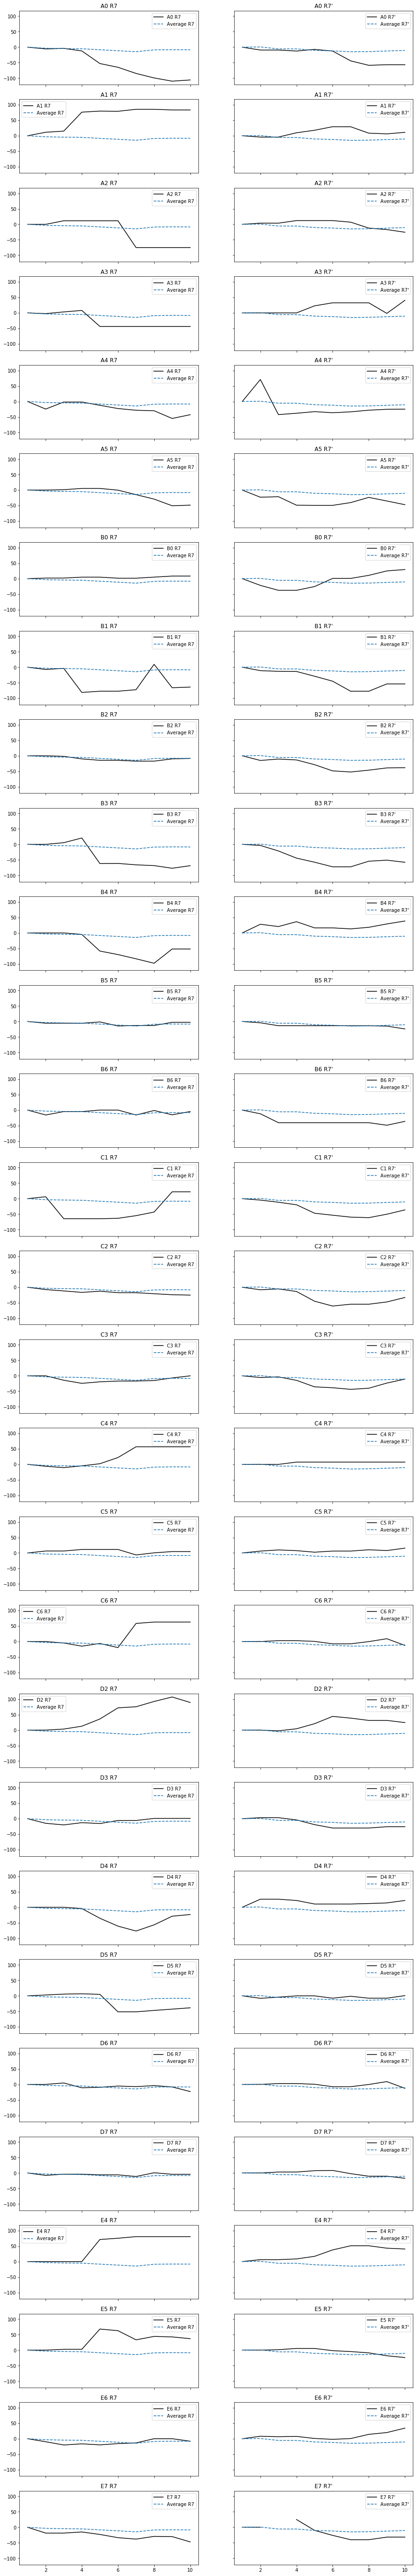

In [9]:
fig, ax = plt.subplots(29, 2, sharex=True, sharey=True, figsize=[15, 100])
for i, om in enumerate(sorted(r7_dev.columns)):
#     if om in dra_om:
#         c = 'darkviolet'
#     else:
#         c = 'k'
    c='k'
    
    ax[i, 0].plot(r7_dev[om], c=c, label=f"{om} R7")
    ax[i, 0].plot(r7_dev.mean(axis=1), ls='--', label="Average R7")
    ax[i, 0].set_title(f"{om} R7")
    ax[i, 0].legend()
    ax[i, 1].plot(r7p_dev[om], c=c, label=f"{om} R7'")
    ax[i, 1].plot(r7p_dev.mean(axis=1), ls='--', label="Average R7'")
    ax[i, 1].set_title(f"{om} R7'")
    ax[i, 1].legend()

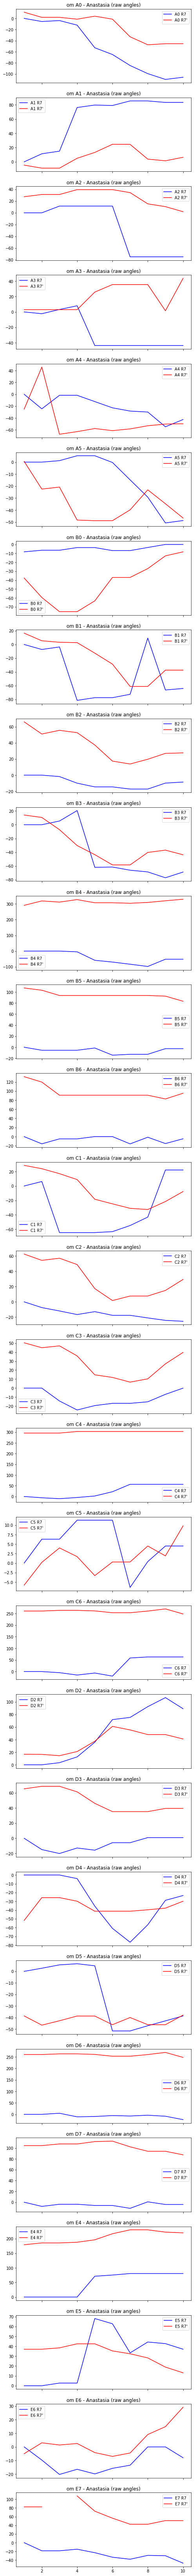

In [25]:
fig, ax = plt.subplots(29, sharex=True, figsize=[8, 120])
for i, om in enumerate(sorted(r7_dev.columns)):
    if om in dra_om:
        c = 'darkviolet'
    else:
        c = 'k'
    
    ax[i].plot(r7[om], c='b', label=f"{om} R7")
    #ax[i].plot(r7.mean(axis=1), ls='--', label="Average R7")
    ax[i].plot(r7p[om], c='r', label=f"{om} R7'")
    #ax[i].plot(r7p.mean(axis=1), ls='--', label="Average R7'")
    ax[i].set_title(f"om {om} - Anastasia (raw angles)")
    ax[i].legend()

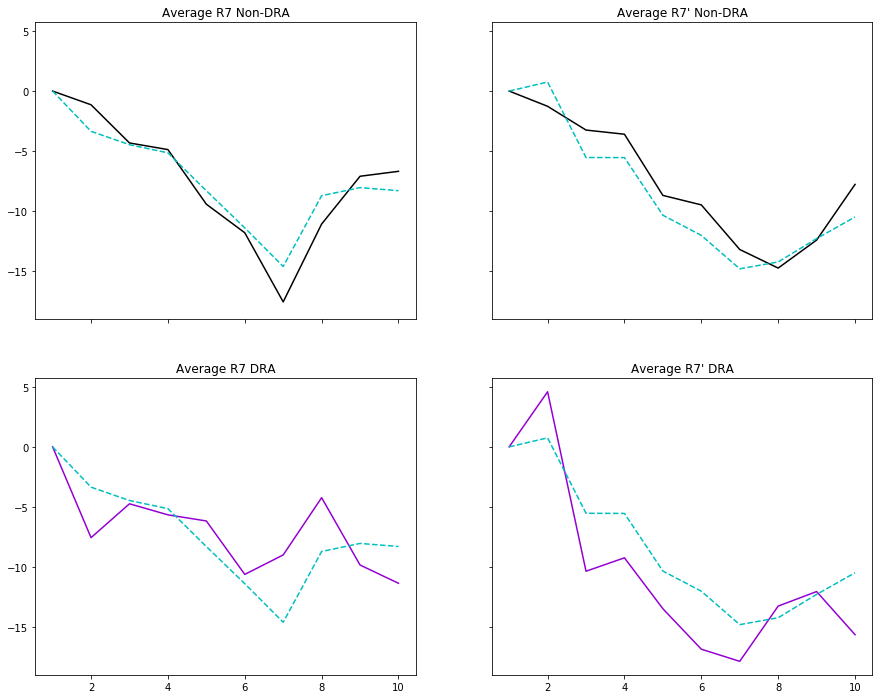

In [69]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[15, 12])

ax[0, 0].plot(r7_dev.filter(items=ndra_om).mean(axis=1), c='k')
ax[0, 0].set_title("Average R7 Non-DRA")
ax[0, 1].plot(r7p_dev.filter(items=ndra_om).mean(axis=1), c='k')
ax[0, 1].set_title("Average R7' Non-DRA")

ax[0, 0].plot(r7_dev.mean(axis=1), ls='--', c='c')
ax[0, 1].plot(r7p_dev.mean(axis=1), ls='--', c='c')

ax[1, 0].plot(r7_dev.filter(items=dra_om).mean(axis=1), c='darkviolet')
ax[1, 0].set_title("Average R7 DRA")
ax[1, 1].plot(r7p_dev.filter(items=dra_om).mean(axis=1), c='darkviolet')
ax[1, 1].set_title("Average R7' DRA")

ax[1, 0].plot(r7_dev.mean(axis=1), ls='--', c='c')
ax[1, 1].plot(r7p_dev.mean(axis=1), ls='--', c='c')

plt.show()

In [56]:
r7_total = np.abs(r7.loc[1] - r7.loc[10])
r7p_total = np.abs(r7p.loc[1] - r7p.loc[10])

In [57]:
r7_total

E7     47.2
D7      4.2
B6      4.7
C6     62.9
D6     23.0
B5      2.6
A5     48.7
D4     23.4
C4     56.8
C3      0.0
B4     51.8
D3      0.9
B3     68.8
B2      8.6
A4     42.6
A1     83.3
C1     22.2
E5     37.0
C5      4.5
E6      8.0
C2     25.4
D5     38.6
E4     80.5
D2     89.2
A2     75.0
A3     43.7
A0    105.8
B0      8.3
B1     64.1
dtype: float64